# Single neuron models
By [Marcus Ghosh](https://profiles.imperial.ac.uk/m.ghosh/) & [Dan Goodman](https://neural-reckoning.org/)

Based on an exercise from our [Neuro4ML](https://neuro4ml.github.io/) course.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/trendinafrica/TReND-CaMinA/blob/main/notebooks/Rwanda24/13-Sat-CompNeuroIntro/Single_neuron_models.ipynb)

In [17]:
!pip install ipdb

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ipdb

# # For Google Colab
# if not os.path.exists('Data/test_current.csv'):
#   !git clone https://github.com/trendinafrica/TReND-CaMinA.git
#   %cd /content/TReND-CaMinA/notebooks/Rwanda24/13-Sat-CompNeuroIntro

!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/kip/notebooks/Zambia25/11-Fri-CompNeuroIntro/Data/test_current.csv

--2025-07-11 11:14:50--  https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/refs/heads/kip/notebooks/Zambia25/11-Fri-CompNeuroIntro/Data/test_current.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12749273 (12M) [text/plain]
Saving to: ‘test_current.csv.1’

test_current.csv.1  100%[===================>]  12.16M  --.-KB/s    in 0.03s   

2025-07-11 11:14:50 (366 MB/s) - ‘test_current.csv.1’ saved [12749273/12749273]



## Aim
We're going to code an increasingly detailed model of a single neuron, then test how well this, and other models can approximate the spikes produced by a "real" neuron in response to a set of random input currents. This "real" neuron is actually just a complex model, but the idea is the same!

The notebook is divided into three parts which you should work on together in pairs.  

**Model** - we'll start with code for an integrate-and-fire neuron, and add a number of features.

**Testing** - we'll test how well this model is able to match data from the "real" neuron.

Finally, we'll run a friendly **competition** to see which pair can best match the "real" neuron's data, using their own models.

For the last 30mins of the session, each pair will summarise what they tried and there will be a small prize for the pair with the model which best approximates the "real" neuron.

Good luck!

## Model

### Integrate-and-fire neuron

We're going to start by looking at the code for a neuron model which simply integrates it's input's over time, spikes when it reaches a threshold and then resets to a baseline value.

We'll define a function (neuron_model) which takes:
* ``I`` - a numpy vector, with the input current at every time-step.
* ``baseline`` - a float, which sets the baseline membrane potential. By default this will be 0.0.
* ``threshold`` - a float, which sets the spiking threshold. By default this will be 1.0.
* ``dt`` - a float, which sets the time between discrete simulation steps. As units we'll use milliseconds, and by default will set the time-step to be 0.1 (ms).

Our function returns:
* ``v`` - a numpy vector, with the output membrane potential at every time-step.
* ``Spikes`` - a numpy vector with the recorded spike times.

In [33]:
def neuron_model(I, baseline=0.0, threshold=1.0, dt=0.1):

    time_steps = len(I) # the number of time-steps in the simulation
    v = np.ones(time_steps) * baseline # membrane potential
    # ipdb.set_trace()
    spikes = [] # a list to store spike times

    for time in range(time_steps - 1):
        print(time)
        # First spike at 121 timestamp!
        print(f'v the memberane potential is: {v[time]}')
        if v[time] > threshold:
            spikes.append(time * dt) # record spike time
            v[time] = baseline # reset membrane potential


        v[time + 1] = v[time] + I[time]*dt # update membrane potential

    return v, np.array(spikes)

To see how our models behave we'll define a function to plot both the input current (``I``) and how our model responds: ``v`` and ``Spikes``.

In [11]:
def plot_model_response(I, v, spikes, dt=0.1):
    plt.plot(np.arange(len(I))*dt, I, color='xkcd:purple', linewidth=2, label='Input current')
    plt.plot(np.arange(len(I))*dt, v, color='xkcd:dark seafoam green', linewidth=2, label='Membrane potential')

    for i, t in enumerate(spikes):
        plt.axvline(t, c='xkcd:grey', lw=2, label='Spikes' if i==0 else None)

    plt.xlabel('Time (ms)')
    plt.ylabel('V')
    plt.legend()

Now we'll input a random current to our model.

As an input we'll load a random current, which was input to our "real" neuron. That way we can easily see how each version of our model responds to the same input.

In [4]:
test_I = np.loadtxt('/content/test_current.csv') # shape (repeats, num_time_steps)
I = np.copy(test_I[0, :300]) # we'll use the input from the first repeat, and the first 30ms
I[50:100] = 0.0 # to see what our model's do without input, we'll also set the input, over some time-steps, to zero

v, spikes = neuron_model(I) # simulate
plot_model_response(I, v, spikes)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/bdb.py", line 336, in set_trace
    sys.settrace(self.trace_dispatch)



5
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
> /tmp/ipython-input-1-315368489.py(20)neuron_model()
     19             ipdb.set_trace()
---> 20             time += rest if time + rest < time_steps else 0
     21             print(time)

ipdb> quit()



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.11/bdb.py", line 361, in set_quit
    sys.settrace(None)



In [ ]:
I.shape, I # 300 timesteps

### Adding a refractory period  

After spiking, real neurons enter a refractory period - during which they will not spike.

One way to model this is to:
* Add ``r_timer`` as a parameter to our function. This should be a float (e.g. 0.5) which sets the length of the refractory period (in ms).
* Following each spike set a counter (``r_time``) to ``r_timer``.
* Then for subsequent time steps, set ``v`` to baseline and decrease the timer by ``dt``, until the timer reaches zero.

Copy the neuron model function from above into the cell below, edit it to include a refractory period and then try plotting it's response to the input current above.

How does changing the length of the refractory period change the neuron's behaviour?

In [9]:
# Enter your solution here.
def neuron_model(I, baseline=0.0, threshold=1.0, dt=0.1, r_timer = 0.5):

    time_steps = len(I) # the number of time-steps in the simulation
    v = np.ones(time_steps) * baseline # membrane potential
    spikes = [] # a list to store spike times

    for time in range(time_steps - 1):
        if v[time] > threshold:
            spikes.append(time * dt) # record spike time
            rest = int(r_timer/ dt)
            # reset membrane potential for the next rest time steps, ensuring we don't go out of bounds
            end_slice = min(time + rest, time_steps)
            v[time: end_slice] = [baseline] * (end_slice - time)
            # The time variable in the loop will be incremented by 1 in the next iteration
            # We don't need to manually increment time here for the refractory period,
            # as the loop structure handles the time steps.

        v[time + 1] = v[time] + I[time]*dt # update membrane potential

    return v, np.array(spikes)

In [69]:
we = [2,34,5,6,7,8,9,9,0,10]
we[2:4] = [0.0] * 2
we

[2, 34, 0.0, 0.0, 7, 8, 9, 9, 0, 10]

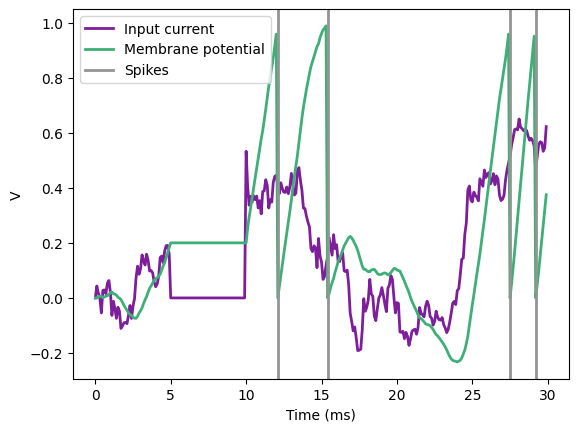

In [12]:
v, spikes = neuron_model(I) # simulate
plot_model_response(I, v, spikes)

In [ ]:
# If you are stuck or would like to check your answer you can:
# Check Solutions/refractory_period.py

# Or if you are running locally, you can:
# Uncomment and run the line below to load the solution.
# %load ./Solutions/refractory_period.py

In [60]:
# Plot model response
v, spikes = neuron_model(I) # simulate
plot_model_response(I, v, spikes)

5
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
> /tmp/ipython-input-58-2340209798.py(20)neuron_model()
     19             ipdb.set_trace()
---> 20             time += rest if time + rest < time_steps else 0
     21             print(time)

ipdb> quit()


### Adding a leak  

Rather than integrating and retaining their inputs indefinitely, real neuron's leak some current.

This means that when they receive little or no input, their membrane potential will tend towards their baseline.

Adding this leak will make our model a **leaky** integrate-and-fire neuron. This model's membrane potential changes over time as:

$$ \tau \frac{dV}{dt} = I(t)-v $$

Where:
* $ \tau $ determines the rate of decay.     
* $ I(t) $ is the time-varying input current to the neuron.
* $ v $ is the neuron's membrane potential.

Copy your neuron model function from above into the cell below, then:
* Add a parameter ``tau`` - the membrane time constant in ms. E.g. 5.  
* Find dV/dt (using the equation above).
* Use dV/dt to update the membrane potential.

Finally try plotting this model's response to the input current above.

How does altering $ \tau $ change the neuron's behaviour?

In [ ]:
# Enter your solution here.

In [ ]:
# If you are stuck or would like to check your answer you can:
# Check Solutions/leak.py

# Or if you are running locally, you can:
# Uncomment and run the line below to load the solution.
# %load ./Solutions/leak.py

In [ ]:
# Plot model response
scale = 10 # Depending on how you implemented the leak, you may need to scale I to get your model to spike
v, spikes = neuron_model(I * scale) # simulate
plot_model_response(I, v, spikes)

### Adding a dynamic threshold

Many neuron's change their behaviour depending on their own recent activity.

For example, in response to constant input they'll spike less and less frequently.

One way to model this is to add a dynamic threshold.

To do so:
* Add a threshold increment parameter ``thr_i`` - following a spike we will increase our threshold by this amount (e.g. 2).
* Add a threshold decay parameter ``thr_tau`` - at every time time-step we'll use this value (e.g. 50) to decay our threshold back to it's starting value (``threshold``)  

Again, copy your neuron model function from above, edit the code and then try plotting your model's response.

How does changing these new parameters change the model's behaviour?

In [ ]:
# Enter your solution here.

In [ ]:
# If you are stuck or would like to check your answer you can:
# Check Solutions/dynamic_threshold.py

# Or if you are running locally, you can:
# Uncomment and run the line below to load the solution.
# %load ./Solutions/dynamic_threshold.py

In [ ]:
# Plot model response
v, spikes = neuron_model(I * scale) # simulate
plot_model_response(I, v, spikes)

# Testing

## Introduction
Now we're going to see how well our model can approximate the spikes produced by a "real" neuron in response to a set of random input currents. Again, this "real" neuron is actually just a complex model, but the idea is the same!

The data are split into **test** and **train** sets with three files each:
* **Current** - the input currents that were injected into the neuron. A numpy array of shape repeats x time which we'll call ``I``.  

* **Traces** - the membrane potential response to each input current. A numpy array of shape repeats x time which we'll call ``v``.

* **Spikes** - contains two numpy vectors which we'll term:
    * ``spike_times`` - the time of each spike (in ms).
    * ``spike_idx`` - which repeat each spike comes from.

In each data set there are:
* **Train** - 100 repeats, with 10,000 time steps each.
* **Test** - 50 repeats, with 10,000 time steps each.

We'll start by plotting the first 10 repeats from the train set. Note that we'll normalise the data so we can plot several repeats per plot.

In [ ]:
# Load train data
train_I = np.loadtxt('Data/train_current.csv') # shape (repeats, num_time_steps)
train_v = np.loadtxt('Data/train_traces.csv') # shape (repeats, num_time_steps)
train_spike_times, train_spike_idx = np.loadtxt('Data/train_spikes.csv') # shape (num_spikes,)

repeats, num_time_steps = train_I.shape
state_t = np.arange(num_time_steps)*0.1 # in ms

def normalise(x):
    return (x-x.min())/(x.max()-x.min())

# Plotting
for idx_repeat in range(10):
    plt.plot(state_t, idx_repeat+0.9*normalise(train_I[idx_repeat, :]), color='xkcd:purple', label='Input current' if idx_repeat==0 else None)
    plt.plot(state_t, idx_repeat+0.9*normalise(train_v[idx_repeat, :]), color='xkcd:dark seafoam green', label='Membrane potential' if idx_repeat==0 else None)
plt.xlabel('Time (ms)')
plt.ylabel('Repeat index')
plt.legend(loc='best')
plt.tight_layout()

## Testing our model

Now we're going to test how well our model approximates this "real" neuron's spiking.

To do so, we will:
* Input the same currents to our model,
* Record it's spikes.
* Then compare our model's spikes to those from the "real" neuron.

First, we'll do this **qualitatively**, by taking the first 10 input currents, and plotting both our model and the "real" neuron's spikes.

In [ ]:
def plot_approximation(neuron_spike_times, neuron_spike_idx, input_I):
    for idx_repeat in range(10):
        model_v, model_spikes = neuron_model(input_I[idx_repeat]) # simulate
        neuron_spikes = neuron_spike_times[neuron_spike_idx==idx_repeat] # get "real" spikes

        plt.scatter(model_spikes, idx_repeat*np.ones(len(model_spikes)), marker='.', color='xkcd:dark seafoam green', label='Neuron model' if idx_repeat==0 else None)
        plt.scatter(neuron_spikes, idx_repeat*np.ones(len(neuron_spikes))+0.2, marker='.', color='xkcd:purple', label='"Real" neuron' if idx_repeat==0 else None)

    plt.xlabel('Time (ms)')
    plt.ylabel('Repeat')
    plt.legend()

plot_approximation(train_spike_times, train_spike_idx, train_I)

Now we'll now compare our model **quantitively** to the "real" neuron.

To do so we'll measure the [van Rossum distance](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony#van_Rossum_distance) between the spike trains from each using a pair of functions:

 ``van_rossum_distance`` - returns the distance between two spike trains ``t0`` and ``t1`` over a given ``duration`` (all measured in ms).  

 ``mean_vr_distance`` - returns the mean distance between our model and the "real" neuron across our entire train or test set.

Don't worry too much about this metric or these functions! All you need to know is that in our case a smaller van Rossum distance means a better match between a model and the "real" neuron.

In [ ]:
def van_rossum_distance(t0, t1, duration, tau_vr=5, dt=0.1):
    # Note that tau_vr is not the same as the tau used in our neuron_model.
    n = int(np.round(duration/dt))
    x0 = np.zeros(n)
    x1 = np.zeros(n)
    for x, t in [(x0, t0), (x1, t1)]:
        x[np.array(np.round(t/dt), dtype=int)] = 1
    nk = int(np.round(3*tau_vr/dt))
    if 2*nk+1>n:
        nk = (n-1)//2
    T = np.arange(-nk, nk+1)*dt
    kernel = np.exp(-T/tau_vr)/tau_vr
    for x in [x0, x1]:
        x[:] = np.convolve(x, kernel, 'same')
    return np.sqrt(np.sum((x0-x1)**2*dt)/tau_vr)

In [ ]:
def mean_vr_distance(neuron_spike_times, neuron_spike_idx, input_I, dt=0.1, plot_aprox=True):
    duration=input_I.shape[1]*dt

    # Convert (t,i) format to list
    neuron_spikes, model_spikes = [], []
    for idx_repeat in range(input_I.shape[0]):

        # "Real" neuron
        n_spikes = neuron_spike_times[neuron_spike_idx==idx_repeat]
        neuron_spikes.append(neuron_spike_times[neuron_spike_idx==idx_repeat])

        # Model
        model_v, m_spikes = neuron_model(input_I[idx_repeat], baseline=0.0, threshold=1.0, dt=0.1, r_timer=0.5, tau=5, thr_i=2, thr_tau=50) # simulate
        model_spikes.append(m_spikes)

        # Plotting
        if (plot_aprox == True) & (idx_repeat < 10):
            plt.scatter(m_spikes, idx_repeat*np.ones(len(m_spikes)), marker='.', color='xkcd:dark seafoam green', label='Neuron model' if idx_repeat==0 else None)
            plt.scatter(n_spikes, idx_repeat*np.ones(len(n_spikes))+0.2, marker='.', color='xkcd:purple', label='"Real" neuron' if idx_repeat==0 else None)

            plt.xlabel('Time (ms)')
            plt.ylabel('Repeat')
            plt.legend()

    # Distance
    d = 0
    for t0, t1 in zip(neuron_spikes, model_spikes):
        d += van_rossum_distance(t0, t1, duration, dt=dt)
    d /= len(neuron_spikes)

    if plot_aprox == True:
        print("Distance: " + str(d))

    return d

In [ ]:
d = mean_vr_distance(train_spike_times, train_spike_idx, train_I)

## Competition

Finally, we're going to have a friendly **competition** to see which pair can best match the "real" neuron's data, using their own models. Then for the last 30mins of the session, each pair will summarise what they tried and there will be a small prize for the pair with the model which best approximates the "real" neuron.

As a measure we'll use the mean van Rossum distance between the model and "real" neuron over the **test** set (using the ``mean_vr_distance`` function). Note that you should use the **train** data for model development, fitting etc.  

You are free to try whatever you like - though here are some ideas to get you started!

* **Fitting model parameters** - throughout we've introduced several parameters to our model, guessing or even fitting different values for these could improve our approximation. For example, earlier we multiplied ``I`` by ``scale`` - we could add this to the ``mean_vr_distance`` function and test how changing it's value changes the approximation.

* **Improving the neuron model** - real neurons have many complexities which we have simplified or overlooked. Improving how we have modelled these, or even adding new features could improve our model. For example, we have modelled the refractory period by simply setting the membrane potential to a baseline value, when in fact it *hyperpolarises* - dipping below baseline before returning.       

* **"Non-neuron" models** - in principle any model which accepts ``I`` and returns spikes could approximate our data. For example, you could train a recurrent neural network to do this.   

In [ ]:
# Load test data
test_I = np.loadtxt('Data/test_current.csv') # shape (repeats, num_time_steps)
test_v = np.loadtxt('Data/test_traces.csv') # shape (repeats, num_time_steps)
test_spike_times, test_spike_idx = np.loadtxt('Data/test_spikes.csv') # shape (num_spikes,)

# Test model
d = mean_vr_distance(test_spike_times, test_spike_idx, test_I)